----
<h1><b>Writing like Shakespeare</b></h1>
<p> - Konark Verma</p>
</br>
<p><b>Problem Statement:</b></p><p>Using a collection of Shakespeare Sonnets, we want to built a Deep Learning System using a deep Recurrent Neural Network with a combination of Bidirectional-LSTMs and LSTMs that could help us generate similar poems.</p>
</br>
<p><b>Real-world/Business objectives and constraints:</b>
<ol>
<li>Minimize multi-class error.</li>
<li>Multi-class probability estimates.</li>
<li>Generating output should not take hours and block the user's computer. It should finish within a few seconds.</li>
</ol>


In [1]:
# Importing the required libraries.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

----
<h3><b>Collecting the data</b></h3>

<p><b>Data:</b></p><p>Our dataset contains a collection of Shakespeare Sonnets, the link for which is as follows: </br><a>https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt</a></p>

<b>Data sample:</b></br>
<p><i>
Come all ye maidens young and fair</br>
And you that are blooming in your prime</br>
Always beware and keep your garden fair</br>
Let no man steal away your thyme</br>
For thyme it is a precious thing</br>
And thyme brings all things to my mind</br>
</i></p>
</br>

In [2]:
# Collecting the text file containing the list of Irish Poems.
!wget no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
-O /tmp/sonnets.txt

--2020-06-20 18:50:10--  http://no-check-certificate/
Resolving no-check-certificate (no-check-certificate)... failed: Name or service not known.
wget: unable to resolve host address ‘no-check-certificate’
--2020-06-20 18:50:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-06-20 18:50:10 (123 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]

FINISHED --2020-06-20 18:50:10--
Total wall clock time: 0.3s
Downloaded: 1 files, 91K in 0.001s (123 MB/s)


----
<h3><b>Exploratory Data Analysis</b></h3>

Number of poem lines in our dataset: 2158
Number of unique words in our dataset: 3210

Minimum length of a sentence 5
Maximum length of a sentence 11



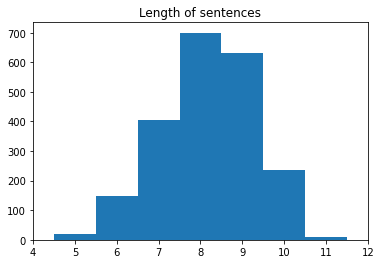

In [3]:
# Counting the number of lines in our dataset.
with open('/tmp/sonnets.txt') as file:
    data = file.read().split('\n')[:-1]
    lines = len(data)
print('Number of poem lines in our dataset:', lines)

# Counting the number of unique words in our dataset.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
words = len(tokenizer.word_index)
print('Number of unique words in our dataset:', words)
print()

# Finding the minumum and maximum number of words in a sentence.
data_tokenized = tokenizer.texts_to_sequences(data)
lines_length = [len(sentence) for sentence in data_tokenized if len(sentence)>1]
print('Minimum length of a sentence', min(lines_length))
print('Maximum length of a sentence', max(lines_length))
print()

# Plotting a graph representing the words in different sentences.
plt.title('Length of sentences')
plt.hist(lines_length, bins=np.arange(5,13)-0.5)
plt.xlim([4, 12])
plt.show()

-----
<h3><b>Preparing the Data</b></h3>
<p><b>Steps:</b></p>
<ol>
<li>Tokenizing the data, using a word tokenizer</li>
<li>Create n-gram sequences</li>
<li>Pre-padding the sentences to make them of equal lengths</li>
<li>Spliting the last word from each sentence to form label</li>
</ol>

Consider this example:<br>
* Sentence : 'Come all ye maidens young and fair'</br>
* Step-1 : </br>
 [51, 12, 96, 1217, 48, 2, 69]
* Step-2 : </br>
 [51, 12]</br>
 [51, 12, 96]</br>
 [51, 12, 96, 1217]</br>
 [51, 12, 96, 1217, 48]</br>
 [51, 12, 96, 1217, 48, 2]</br>
 [51, 12, 96, 1217, 48, 2, 69]</br>
* Step-3 : </br>
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12]</br>
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96]</br>
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217]</br>
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48]</br>
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2]</br>
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2, 69]</br>
* Step-4 : </br>
Final training sequences and labels: </br>
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51]&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[12]</br>
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12]&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[96]</br>
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96]&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1217]</br>
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217]&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[48]</br>
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48]&nbsp;&nbsp;&nbsp;[2]</br>
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 12, 96, 1217, 48, 2]&nbsp;&nbsp;&nbsp;[69]</br>

In [4]:
# Opening the text file containing the Shakespeare Sonnets.
with open('/tmp/sonnets.txt') as file:
    data = file.read().split('\n')[:-1]
data = [sentence for sentence in data if len(sentence.split())>1]

# Tokenizing the data, using word tokenizer.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
data_tokenized = tokenizer.texts_to_sequences(data)

# Creating the n-gram sequences.
training_sequences = []
for sequence in data_tokenized:
    for i in range(2,len(sequence)+1):
        training_sequences.append(sequence[:i])

# Pre-padding the data with zeros.
data_padded = pad_sequences(training_sequences)

# Preparing the training data.
x_train, y_train = data_padded[:,:-1], data_padded[:,-1]

----
<h3><b>Training the model</b></h3>
<p>We are using a Sequential model with the following layers:</p>
<ol>
<li>Embedding</li>
<li>Bidirectional LSTM</li>
<li>Dropout</li>
<li>LSTM</li>
<li>Dense</li>
<li>Dense</li>
</ol>

<p>We are also using the following parameters:</p>
<ul>
<li>vocab_size = len(tokenizer.word_index) + 1</li>
<li>wv_dims = 100</li>
<li>input_length = x_train.shape[1]</li>
<li>dropout_rate = 0.2</li>
<li>lstm_units = 128</li>
<li>regularization_rate = 0.01</li>
<li>epochs = 60</li>
</ul>

In [5]:
# Setting the parameters for our model.
vocab_size = len(tokenizer.word_index) + 1
wv_dims = 100
input_length = x_train.shape[1]
dropout_rate = 0.2
lstm_units = 128
regularization_rate = 0.01
epochs = 60

In [6]:
# Building a sequential model with Bidirectional LSTM and LSTM layers.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, wv_dims, input_length=input_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, return_sequences=True)))
model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.LSTM(lstm_units))
model.add(tf.keras.layers.Dense(vocab_size//4, activation='relu', 
                                activity_regularizer=tf.keras.regularizers.l2(regularization_rate)))
model.add(tf.keras.layers.Dense(vocab_size, activation='softmax'))

# Printing the summary of our model.
model.summary()

# Compiling our model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Finally, training the model.
history = model.fit(x_train, y_train, epochs=epochs)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321000    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 256)           234496    
_________________________________________________________________
dropout (Dropout)            (None, 10, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 802)               103458    
_________________________________________________________________
dense_1 (Dense)              (None, 3210)              2577630   
Total params: 3,433,704
Trainable params: 3,433,704
Non-trainable params: 0
______________________________________________

----
<h3><b>Plotting the training accuracy and training loss</b></h3>

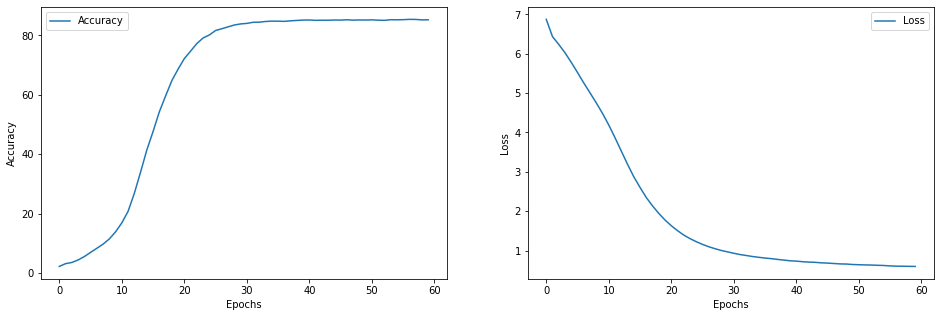

In [7]:
# Getting the values of accuracy and loss from history.
accuracy = np.array(history.history['accuracy'])*100
loss = history.history['loss']
epochs = range(len(accuracy))

# Plotting the graphs.
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(epochs, accuracy, label='Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.subplot(122)
plt.plot(epochs, loss, label='Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

----
<h3><b>Generate the text using the learned model</b></h3>

In [8]:
def generate_text(text, next_words):
    for _ in range(next_words):
        tokenized_string = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([tokenized_string], maxlen=x_train.shape[1])
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        text += " " + output_word
    return text

<p><b>Example-1</b></p>

In [9]:
user_input = 'Oh once great men have fallen'
next_words = 50
generate_text(user_input, next_words)

"Oh once great men have fallen with this flatter'd my life control her treasure so lie to thee with me might lie to be my true sight and me shines so bad in seen afloat wanting face to show it love with hate thee as me alone nearly in hue woe pride ' add to misuse"

<p><b>Example-2</b></p>

In [11]:
user_input = 'help me jesus, you are my only hope'
next_words = 50
generate_text(user_input, next_words)

"help me jesus, you are my only hope new seen ' ' shows me copy in thine own poor love's might know dwell in effect clearer night light lie affords night doth lie with my view to me with stand thou dost advance slain ' shows me young to dull behind a gilded tomb the night night doth"

<p><b>Example-3</b></p>

In [10]:
user_input = ''
next_words = 50
generate_text(user_input, next_words)

" is it thy will thy image should keep open part hid days shine bright ' had skill or dwell and see forth me doth live old part new treasure love seen afloat afloat tongue extreme desert his sickle hour invocate survey survey ' go ' defaced new decay alone are"

----
<h3><b>Conclusions</b></h3>

* On retraining the model we can get different results for the same input.</br>

<b>For example, Generated text:</b></br>
<p>Is it thy will thy image should keep open part hid days shine bright ' had skill or dwell and see forth me doth live old part new treasure love seen afloat afloat tongue extreme desert his sickle hour invocate survey survey ' go ' defaced new decay alone are you so dignifies his story pride of new lips shall show me wrong night days</p>

<b>Some points to note:</b>
* These results are quite good, the text seems to make some sense as well as it seems to be written by the great William Shakespeare himself.
* Though, these generated texts are not perfect, and can have some improvement.
* We actually need more training data, and much more computation power, to generate more better texts.
---